<a href="https://colab.research.google.com/github/theunixdisaster/deep-learning-with-python-book/blob/main/FrancoisChap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 17s 5ms/step - loss: 0.1220 - accuracy: 0.9615
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0370 - accuracy: 0.9891
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0133 - accuracy: 0.9958


An incorrectly structured convnet missing its max-pooling layers

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

print(model_no_max_pool.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainable

# Cats vs Dogs

In [1]:
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/kaggle.json && chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c dogs-vs-cats

 98% 792M/812M [00:03<00:00, 249MB/s]
100% 812M/812M [00:03<00:00, 214MB/s]


In [3]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [4]:
!unzip -qq train.zip

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir/fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [6]:
#image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = (180, 180),
    batch_size = 32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = (180, 180),
    batch_size = 32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = (180, 180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
callbacks = [
            keras.callbacks.ModelCheckpoint(
                filepath="convnet_from_scratch.keras",
                save_best_only=True,
                monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 5s 70ms/step - loss: 0.0182 - accuracy: 0.9950 - val_loss: 4.0800 - val_accuracy: 0.6470
Epoch 2/30
63/63 [==============================] - 5s 69ms/step - loss: 0.0508 - accuracy: 0.9895 - val_loss: 3.4585 - val_accuracy: 0.6610
Epoch 3/30
63/63 [==============================] - 5s 69ms/step - loss: 0.0241 - accuracy: 0.9905 - val_loss: 3.8274 - val_accuracy: 0.6720
Epoch 4/30
63/63 [==============================] - 5s 69ms/step - loss: 0.0378 - accuracy: 0.9915 - val_loss: 3.8129 - val_accuracy: 0.6630
Epoch 5/30
63/63 [==============================] - 5s 69ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 4.6990 - val_accuracy: 0.6580
Epoch 6/30
63/63 [==============================] - 5s 69ms/step - loss: 0.0746 - accuracy: 0.9855 - val_loss: 3.9231 - val_accuracy: 0.6690
Epoch 7/30
63/63 [==============================] - 5s 71ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 4.1766 - val_accuracy: 0.6630
Epoch 8/30
63

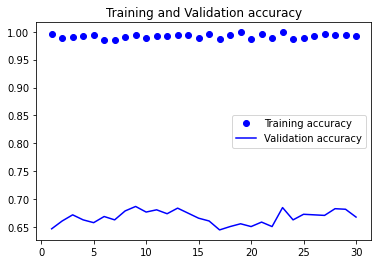

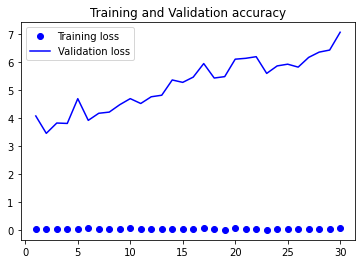

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
data_augmentation = keras.Sequential([
                                      layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2)
])

In [ ]:
#Retraining the model with augmentation so as to reduce overfitting and Dropout

inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss"
)]
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 6s 73ms/step - loss: 0.7708 - accuracy: 0.5110 - val_loss: 0.6900 - val_accuracy: 0.5210
Epoch 2/100
63/63 [==============================] - 5s 70ms/step - loss: 0.7032 - accuracy: 0.5395 - val_loss: 0.7021 - val_accuracy: 0.5220
Epoch 3/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6874 - accuracy: 0.5915 - val_loss: 0.6592 - val_accuracy: 0.6250
Epoch 4/100
63/63 [==============================] - 5s 69ms/step - loss: 0.6514 - accuracy: 0.6315 - val_loss: 0.6622 - val_accuracy: 0.5630
Epoch 5/100
63/63 [==============================] - 5s 70ms/step - loss: 0.6308 - accuracy: 0.6510 - val_loss: 0.6209 - val_accuracy: 0.6370
Epoch 6/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6131 - accuracy: 0.6595 - val_loss: 0.9597 - val_accuracy: 0.6190
Epoch 7/100
63/63 [==============================] - 5s 70ms/step - loss: 0.6091 - accuracy: 0.6835 - val_loss: 0.6273 - val_accuracy: 0.6110
Epoch 

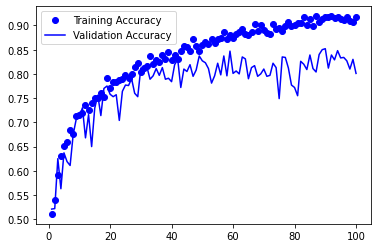

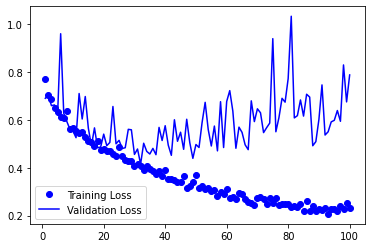

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title = "Training and Validation Accuracy"
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title = "Training and Validation Loss"
plt.legend()
plt.show()

# Redoing it with VGG16

In [ ]:
from tensorflow import keras

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
print(conv_base.summary())

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
#recording the output of the convbase, storing it in a numpy array and then using on densely connected layers
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
#Here we define our densely connected model
from tensorflow.keras import layers
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

callbacks = keras.callbacks.ModelCheckpoint(filepath="feature_extraction.keras", save_best_only = True, monitor="val_loss")

history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels), callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 12ms/step - loss: 24.4735 - accuracy: 0.9275 - val_loss: 5.5523 - val_accuracy: 0.9660
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.1837 - accuracy: 0.9720 - val_loss: 4.7159 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 3.0072 - accuracy: 0.9810 - val_loss: 4.6749 - val_accuracy: 0.9800
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1605 - accuracy: 0.9880 - val_loss: 5.5405 - val_accuracy: 0.9700
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7406 - accuracy: 0.9935 - val_loss: 6.9746 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5091 - accuracy: 0.9980 - val_loss: 9.5457 - val_accuracy: 0.9640
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2506 - accuracy: 0.9965 - val_loss: 5.9625 - val_accuracy: 0.9690
Epoch 8/20
63/63 [

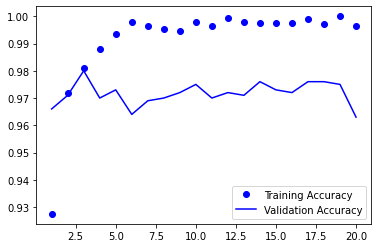

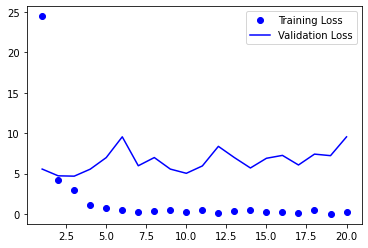

In [ ]:
#Now we plot out what we got
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title="Training and Validation Accuracy"
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title="Training and Validation Loss"
plt.legend()
plt.show()

In [8]:
#Training through feature extraction and data augmentation
from tensorflow import keras
from tensorflow.keras import layers

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False

data_augmentation = keras.Sequential([
                                      layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2)
])
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

callbacks = keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss"
)

history = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callbacks)

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/50
63/63 [==============================] - 26s 200ms/step - loss: 18.9406 - accuracy: 0.8975 - val_loss: 3.6419 - val_accuracy: 0.9690
Epoch 2/50
63/63 [==============================] - 11s 165ms/step - loss: 7.4184 - accuracy: 0.9450 - val_loss: 6.0050 - val_accuracy: 0.9640
Epoch 3/50
63/63 [==============================] - 11s 166ms/step - loss: 5.6326 - accuracy: 0.9535 - val_loss: 4.0408 - val_accuracy: 0.9700
Epoch 4/50
63/63 [==============================] - 11s 167ms/step - loss: 5.0205 - accuracy: 0.9640 - val_loss: 10.7049 - val_accuracy: 0.9460
Epoch 5/50
63/63 [==============================] - 11s 170ms/step - loss: 6.5814 - accuracy: 0.9605 - val_loss: 2.9378 - val_accuracy: 0.9790
Epoch 6/50
63/63 [==============================] - 11s 168ms/step - loss: 2.8793 - accuracy: 0.9715 - val_loss: 3.8125 - val_accuracy: 0.9790
Epoch 7/50
63/63 [==============================] - 11s 171ms/step - loss: 

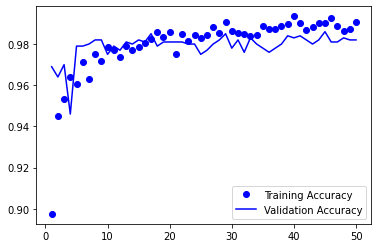

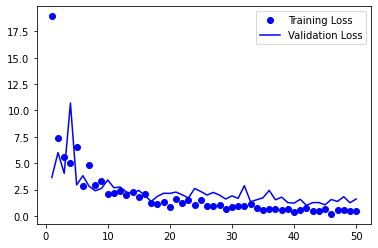

In [11]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title="Training and Validation Accuracy"
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.legend()
plt.show()

In [13]:
#Testing
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc: .3f}")

63/63 [==============================] - 8s 115ms/step - loss: 2.2736 - accuracy: 0.9770
Test accuracy:  0.977
